In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

train_data = pd.read_csv("/content/drive/My Drive/MAAI/data/train.csv")
valid_data = pd.read_csv("/content/drive/My Drive/MAAI/data/validation.csv")
test_data = pd.read_csv("/content/drive/My Drive/MAAI/data/test.csv")

In [0]:
processed_train_data = pd.read_csv("/content/drive/My Drive/MAAI/data/train1.csv")
processed_valid_data = pd.read_csv("/content/drive/My Drive/MAAI/data/validation1.csv")
processed_test_data = pd.read_csv("/content/drive/My Drive/MAAI/data/test1.csv")

In [6]:
processed_test_data.head()

,weekday,hour,region,city,adexchange,domain,slotvisibility,slotformat,slotprice,creative,...,usertag_13866,usertag_13874,usertag_14273,usertag_15398,usertag_16593,usertag_16617,usertag_16661,usertag_16706,usertag_16751,usertag_16753
0,0,12,146,159,3,DDTSQuf0MTTNaqKIvMpENpn,0,0,10,00fccc64a1ee2809348509b7ac2a97a5,...,False,False,False,False,False,False,False,False,False,False
1,3,14,1,1,-1,d63d96468f66986d5a8eb5225ad0b6f0,FirstView,Na,5,11908,...,False,False,False,False,False,False,False,False,False,False
2,5,19,27,34,1,trqRTJkrBoq7JsNr5SqfNX,2,1,0,77819d3e0b3467fe5c7b16d68ad923a1,...,True,False,False,False,False,False,False,False,False,False
3,0,21,238,245,4,6d27caf5a202ec085f80af7163ef7cb0,FirstView,Na,30,10717,...,False,False,False,False,False,False,False,False,False,False
4,2,20,27,35,3,3FKElpuEMusyJqKbuKz,0,0,50,44966cc8da1ed40c95d59e863c8c75f0,...,False,False,False,False,False,False,False,False,False,False


## Lagency Analysis

In [0]:
train_data.count()

click             2430981
weekday           2430981
hour              2430981
bidid             2430981
userid            2430981
useragent         2430981
IP                2430981
region            2430981
city              2430981
adexchange        2381152
domain            2293846
url               2344169
urlid                   0
slotid            2430981
slotwidth         2430981
slotheight        2430981
slotvisibility    2430981
slotformat        2430981
slotprice         2430981
creative          2430981
bidprice          2430981
payprice          2430981
keypage           1925991
advertiser        2430981
usertag           1933502
dtype: int64

In [3]:
train_data.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2.0,...,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,NaN
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1.0,...,250,FourthView,Na,0,10722,294,23,NaN,2821,NaN
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2.0,...,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2.0,...,90,OtherView,Na,133,7330,277,133,NaN,2259,NaN


In [0]:
test_data.count()

weekday           303375
hour              303375
bidid             303375
userid            303375
useragent         303375
IP                303375
region            303375
city              303375
adexchange        297201
domain            286326
url               292672
urlid                  0
slotid            303375
slotwidth         303375
slotheight        303375
slotvisibility    303375
slotformat        303375
slotprice         303375
creative          303375
keypage           240016
advertiser        303375
usertag           241361
dtype: int64

In [0]:
train_advertiser_grouped_bids = train_data.groupby('advertiser')
list_train_advertiser_grouped_bids = \
[train_advertiser_grouped_bids.get_group(x) for x in \
 train_advertiser_grouped_bids.groups]

In [0]:
# get colour map
cmap = plt.cm.get_cmap('hsv', 
                       len(train_advertiser_grouped_bids.advertiser.unique()))
for advertiser in train_advertiser_grouped_bids.advertiser.unique():
  advertiser_train_data = train_data.loc[train_data['advertiser'] == advertiser[0]]
  
  print(advertiser[0])

1458
2259
2261
2821
2997
3358
3386
3427
3476


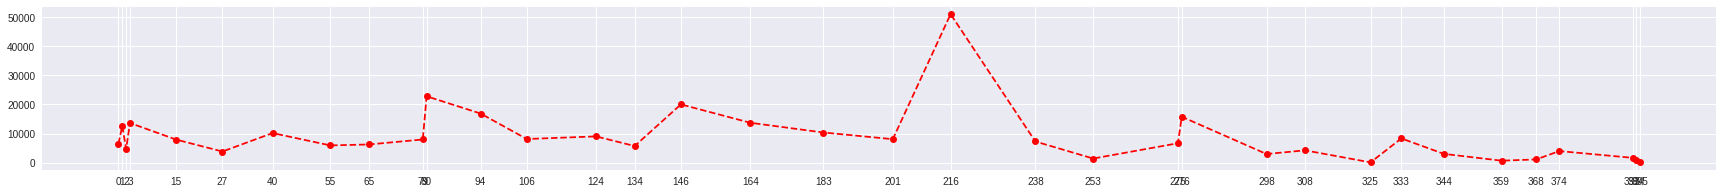

In [0]:
test_region_grouped_bids = test_data.groupby('region').bidid.count()
plt.figure(figsize=(30,3))
plt.xticks(test_data.region.unique())
plt.plot(test_region_grouped_bids, 'r--o')
plt.show()

In [0]:
train_split = np.array_split(train_data, [1], axis = 1)

In [0]:
valid_split = np.array_split(valid_data, [1], axis = 1)

## Const bidding

In [0]:
budget = 6250

In [0]:
# CTR = Click through rate
def calculate_CTR(num_clicks, num_impressions):
  if num_impressions == 0: return 0
  return num_clicks / num_impressions

# CPC = Cost per click
def calculate_CPC(num_clicks, cost = budget):
  return cost / num_clicks

# CPM = Cost per miles (1000 impressions, or say views)
def calculate_CPM(num_impressions, cost = budget):
  return 1000 * cost / num_impressions 

In [0]:
def const_bidding_strategy(data_set, bidding_price, bidding_budget = budget):
  num_clicks = 0
  num_impressions = 0
  origin_budget = budget
  required_prices = data_set['payprice'].values
  is_clicked = data_set['click'].values
  
  for index in range(len(data_set)):
    required_price = required_prices[index]
    is_click = is_clicked[index]
    pay_price_per_imperssion = required_price / 1000
    if bidding_budget > 0:
      if bidding_price >= required_price \
         and bidding_budget >= pay_price_per_imperssion:
        num_clicks += is_click
        num_impressions += 1
        bidding_budget -= pay_price_per_imperssion
    else:
      cost = origin_budget - bidding_budget
      return cost, num_clicks, num_impressions, calculate_CTR(num_clicks, num_impressions)
  return origin_budget - bidding_budget, num_clicks, num_impressions, calculate_CTR(num_clicks, num_impressions)

In [0]:
from tqdm import tqdm_notebook as tqdm

def exp_study_on_const_strategy(lower = 1, upper = 100, 
                                interval = 1, data_set = train_data):
  
  bidding_prices = np.arange(lower, upper, interval)
  list_costs = []
  list_num_clicks = []
  list_num_impressions = []
  list_ctr = []
  max_clicks = -1
  max_click_price = -1
  max_ctr = -1
  max_ctr_click_price = -1
  
  for price in tqdm(bidding_prices):
    cost, num_clicks, num_impressions, ctr = \
      const_bidding_strategy(data_set, price)
    list_costs.append(cost)
    list_num_clicks.append(num_clicks)
    list_num_impressions.append(num_impressions)
    list_ctr.append(ctr)
    if num_clicks > max_clicks:
      max_clicks = num_clicks
      max_click_price = price
    if ctr > max_ctr:
      max_ctr = ctr
      max_ctr_click_price = price
  max_price_and_ctr = [max_clicks, max_click_price, max_ctr, max_ctr_click_price]
  return max_price_and_ctr, list_costs, list_num_clicks, list_num_impressions, list_ctr

In [0]:
max_price_and_ctr, list_costs, list_num_clicks, list_num_impressions, list_ctr = \
                                            exp_study_on_const_strategy(data_set = valid_data)

In [0]:
print("Achieved maximum clicks {0} with constant price {1}".format(str(max_price_and_ctr[0]), str(max_price_and_ctr[1])))
print("Achieved maximum CTR {0} with constant price {1}".format(str(max_price_and_ctr[2]), str(max_price_and_ctr[3])))

Achieved maximum clicks 68 with constant price 77
Achieved maximum CTR 0.0005112162368380894 with constant price 89


In [0]:
const_grid_search_on_valid = pd.DataFrame({
     "const_price":np.arange(1, 100, 1),
     "cost":list_costs,
     "num_clicks":list_num_clicks,
     "num_impressions":list_num_impressions,
     "ctr": list_ctr
})
const_grid_search_on_valid.to_csv("/content/drive/My Drive/MAAI/data/const_grid_search_on_valid.csv", sep='\t', encoding='utf-8')

In [0]:
 list_num_clicks

[0,
 0,
 0,
 0,
 0,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 6,
 8,
 9,
 10,
 10,
 13,
 13,
 13,
 14,
 15,
 16,
 16,
 16,
 18,
 18,
 19,
 24,
 24,
 24,
 24,
 24,
 24,
 25,
 27,
 27,
 28,
 28,
 29,
 31,
 31,
 31,
 32,
 33,
 35,
 37,
 43,
 46,
 48,
 48,
 48,
 49,
 49,
 49,
 49,
 49,
 51,
 52,
 53,
 53,
 53,
 55,
 56,
 57,
 57,
 58,
 65,
 64,
 63,
 63,
 63,
 63,
 61,
 68,
 67,
 68,
 66,
 67,
 66,
 66,
 66,
 66,
 66,
 65,
 66,
 67,
 65,
 66,
 65,
 65,
 65,
 65,
 65,
 65,
 63,
 63]

In [0]:
list_num_impressions

[373,
 851,
 943,
 2176,
 7833,
 9624,
 11103,
 12373,
 13708,
 16434,
 18543,
 20368,
 21871,
 23489,
 25058,
 27238,
 29633,
 31880,
 33531,
 47162,
 50940,
 55507,
 56946,
 58778,
 60444,
 61424,
 62823,
 64016,
 65084,
 68444,
 73772,
 75439,
 77564,
 79292,
 80043,
 81864,
 83056,
 84634,
 85541,
 87947,
 89245,
 91302,
 92358,
 94186,
 95875,
 96995,
 98779,
 99812,
 101750,
 115493,
 117911,
 123022,
 124073,
 125005,
 132801,
 134226,
 135553,
 136840,
 138836,
 141045,
 142682,
 143637,
 145072,
 146817,
 147723,
 149327,
 151227,
 152404,
 153397,
 162213,
 161278,
 160602,
 156826,
 156038,
 155373,
 153337,
 146888,
 146338,
 145941,
 140580,
 139958,
 139516,
 139025,
 136896,
 136149,
 135578,
 135132,
 132360,
 131060,
 130579,
 129991,
 129690,
 129316,
 128877,
 127994,
 127585,
 127279,
 127112,
 126862]

In [0]:
list_ctr

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00041562759767248546,
 0.00036026299198414844,
 0.0003232845712438374,
 0.0002918004085205719,
 0.00024339783375927954,
 0.00021571482500134823,
 0.00024548311076197957,
 0.0002286132321338759,
 0.00021286559666226743,
 0.00023944448878601644,
 0.0002937073206549673,
 0.00030371545236729323,
 0.0003136762860727729,
 0.0002982314872804271,
 0.0002756456469191298,
 0.0002552021986650962,
 0.00023420469490334551,
 0.0002458469427176624,
 0.0002551975228827112,
 0.00026470782873403483,
 0.00026048450117218026,
 0.00025468379415182336,
 0.00028117970507373155,
 0.0002765656689816237,
 0.0002775992051896441,
 0.0003253266822100526,
 0.0003181378332162409,
 0.0003094218967562271,
 0.000302678706552994,
 0.0002998388366253139,
 0.0002931691586045148,
 0.0003010017337699865,
 0.00031902072453151214,
 0.0003156381150559381,
 0.0003183735658976429,
 0.00031374306683847834,
 0.0003176272151760093,
 0.00033565040386322785,
 0.0003291359650054148,
 0.0003233376792698

## Random bidding

In [0]:
seed = np.random.seed(1) # For produce same results repeatively
budget = 6250

def random_bidding_strategy(required_prices,is_clicked, min_price = 24, 
                            max_price = 24, bidding_budget = budget):
  num_clicks = 0
  num_impressions = 0
  origin_budget = budget
  bidden_prices = min_price + \
                 (max_price - min_price) * np.random.rand(len(required_prices), 1)
  for index in range(len(required_prices)):
    if bidding_budget > 0:
      if required_prices[index] <= bidden_prices[index] \
           and bidding_budget >= required_prices[index] / 1000:
        num_clicks += is_clicked[index]
        num_impressions += 1
        bidding_budget -= required_prices[index] / 1000
    else:
      cost = origin_budget - bidding_budget
      return cost, num_clicks, num_impressions, calculate_CTR(num_clicks, num_impressions)
  return origin_budget - bidding_budget, num_clicks, num_impressions, calculate_CTR(num_clicks, num_impressions)

In [0]:
from tqdm import tqdm_notebook as tqdm
from itertools  import product

def exp_study_on_random_strategy(min_lower = 1, min_upper = 20, 
                                 window_lower = 50, window_upper = 500,
                                 data_set = train_data):
  
  list_costs = []
  list_num_clicks = []
  list_num_impressions = []
  list_ctrs = []
  list_paras = []
  
  max_clicks = -1
  max_click_min_prices = -1
  max_click_window = -1
  
  max_ctr = -1
  max_ctr_min_prices = -1
  max_ctr_window = -1
  
  min_prices = np.arange(min_lower, min_upper + 1)
  window_size = np.arange(window_lower, window_upper + 1)
  
  required_prices = data_set['payprice'].values
  is_clicked = data_set['click'].values
  
  for min_price, window_size in tqdm(product(min_prices, window_size)):
    cost, num_clicks, num_impressions, ctr = \
      random_bidding_strategy(required_prices, is_clicked, min_price, min_price + window_size,)
    list_costs.append(cost)
    list_num_clicks.append(num_clicks)
    list_num_impressions.append(num_impressions)
    list_ctrs.append(ctr)
    list_paras.append((min_price, window_size))
    if num_clicks > max_clicks:
      max_clicks = num_clicks
      max_click_min_prices = min_price
      max_click_window = window_size
    if ctr > max_ctr:
      max_ctr = ctr
      max_ctr_min_prices = min_price
      max_ctr_window = window_size
  max_price_and_ctr = [max_clicks, max_click_min_prices, max_click_window, max_ctr, max_ctr_min_prices, max_ctr_window]
  return max_price_and_ctr, list_costs, list_num_clicks, list_num_impressions,list_ctrs,list_paras

In [0]:
max_price_and_ctr, list_costs, list_num_clicks, list_num_impressions, list_ctrs, list_paras = exp_study_on_random_strategy(data_set = valid_data)

In [0]:
print("Achieved maximum clicks {0} with lower price boundary {1} and higher price bounary {2}".format(max_price_and_ctr[0], max_price_and_ctr[1], max_price_and_ctr[1] + max_price_and_ctr[2]))
print("Achieved maximum CTR {0} with lower price boundary {1} and higher price bounary {2}".format(max_price_and_ctr[3], max_price_and_ctr[4], max_price_and_ctr[4] + max_price_and_ctr[5]))

Achieved maximum clicks 88 with lower price boundary 1 and higher price bounary 134
Achieved maximum CTR 0.0006802265935144297 with lower price boundary 13 and higher price bounary 499


In [0]:
max_price_and_ctr

[88, 1, 133, 0.0006802265935144297, 13, 486]

In [0]:
random_grid_search_on_valid_new = pd.DataFrame({
    "random_price_min_boundary": [t[0] for t in list_paras],
     "random_price_max_boundary":[t[0] + t[1] for t in list_paras],
     "cost":list_costs,
     "num_clicks":list_num_clicks,
     "num_impressions":list_num_impressions,
      "ctr":list_ctrs
})
random_grid_search_on_valid_new.to_csv("/content/drive/My Drive/MAAI/data/random_grid_search_on_valid_new.csv", sep='\t', encoding='utf-8')

## Multi-agent Random Competition

In [0]:
class Agent(object):
  def __init__(self, budget):
    self.num_impressions = 0
    self.num_clicks = 0
    self.ctr = 0
    self.budget = budget
    self.ori_budgent = budget
    self.cost = 0
    
  def bidding_function(self, bid, required_price):
    raise NotImplementedError
    
  def after_winning_updates(self):
    raise NotImplementedError
    

In [0]:
class RandomAgent(Agent):
  def __init__(self, budget, lower_bound, upper_bound):
    super().__init__(budget)
    self.lower_bound = lower_bound
    self.upper_bound = upper_bound
    
  def bidding_function(self, bid):
    return np.minimum(float(self.budget), self.lower_bound + \
                 (self.upper_bound - self.lower_bound) * np.random.rand())
  def after_winning_updates(self):
    self.num_impressions += 1
    self.ctr = self.num_clicks / self.num_impressions
    self.cost = self.ori_budgent - self.budget

In [0]:
def multi_agents_bidding(agents_list, required_prices, is_clicked, required_preces_per_impression, lower_bound, upper_bound, budget = 6250):
  len_bid = len(required_prices)
  len_agent = len(agents_list)
  remain_budget = np.full((len(agents_list), 1), budget)
  for index in tqdm(range(len_bid)):
      bid_prices = np.minimum(lower_bound + (upper_bound - lower_bound) * np.random.rand(), remain_budget)
      winner_index = np.argmax(bid_prices)
      if required_prices[index] <= bid_prices[winner_index] \
           and agents_list[winner_index].budget >= required_preces_per_impression[index]:
        agents_list[winner_index].num_clicks += is_clicked[index]
        agents_list[winner_index].budget -= required_preces_per_impression[index]
        remain_budget[winner_index][0] -= required_preces_per_impression[index]
        agents_list[winner_index].after_winning_updates()
  ctr = sum([agent.ctr for agent in agents_list])
  num_clicks = sum([agent.num_clicks for agent in agents_list]) 
  num_impressions = sum([agent.num_impressions for agent in agents_list]) 
  return agents_list, ctr, num_clicks, num_impressions

In [0]:
# Default using the best grid search result
def create_random_agent_list(lower_bound = 7, upper_bound = 43, n = 50, budget = 6250):
  return [RandomAgent(budget, lower_bound, upper_bound) for i in range(n)]

In [0]:
from tqdm import tqdm_notebook as tqdm
from itertools import product

ctr_res = []
num_clicks_res = []
num_impressions_res = []
agents_res = []
list_paras_res = []
best_aclick_res = []
best_actr_res = []
min_lower = 5
min_upper = 15
window_lower = 300
window_upper = 400
min_prices = np.arange(min_lower, min_upper + 1, 5)
window_sizes = np.arange(window_lower, window_upper + 1,20)

required_prices = valid_data['payprice'].values
is_clicked = valid_data['click'].values
required_preces_per_impression = required_prices / 1000

for n in range(50, 101):
  best_actr = -1
  best_actr_min_lower = -1
  best_actr_window = -1
  best_aclick = -1
  best_aclick_min_lower = -1
  best_aclick_window = -1
  for lower_bound, window in tqdm(product(min_prices, window_sizes)):
      agent_list = create_random_agent_list(lower_bound, 
                                            lower_bound + window, n
                                            = n)
      agents, \
      ctr,\
      num_clicks,\
      num_impressions = multi_agents_bidding(agent_list, 
                                             required_prices,  
                                             is_clicked,  
                                             required_preces_per_impression, 
                                             lower_bound, 
                                             lower_bound + window)
      agents_res.append(agents)
      ctr_res.append(ctr)
      num_clicks_res.append(num_clicks)
      num_impressions_res.append(num_impressions)
      list_paras_res.append([lower_bound,window,n])
      if num_clicks > best_aclick:
          best_aclick = num_clicks
          best_aclick_min_lower = lower_bound
          best_aclick_window = window
      if ctr > best_actr:
          best_actr = ctr
          best_actr_min_lower = lower_bound
          best_actr_window = window
  best_aclick_res.append([best_aclick, 
                          best_aclick_min_lower,
                          best_aclick_min_lower + best_aclick_window])
  best_actr_res.append([best_actr,
                        best_actr_min_lower,
                        best_actr_min_lower + best_actr_window])
  
  multi_random_on_valid = pd.DataFrame({
     "n_agent": [t[2] for t in list_paras_res],
     "random_price_min_boundary": [t[0] for t in list_paras_res],
     "random_price_max_boundary":[t[0] + t[1] for t in list_paras_res],
     "num_clicks":num_clicks_res,
     "num_impressions":num_impressions_res,
     "ctr":ctr_res
  })
  multi_random_on_valid.to_csv("/content/drive/My Drive/MAAI/multi_random_on_valid2.csv", sep='\t', encoding='utf-8')

multi_random_on_valid_summary = pd.DataFrame({
     "n_agent": np.arange(50, 100 + 1),
     "best_num_clicks":[t[0] for t in best_aclick_res],
     "best_ctr":[t[0] for t in best_actr_res] ,
     "best_ctr_price_min_boundary": [t[1] for t in best_actr_res],
     "best_ctr_price_max_boundary":[t[2] for t in best_actr_res],
     "best_nclicks_price_min_boundary": [t[1] for t in best_aclick_res],
     "best_nclicks_price_max_boundary":[t[2] for t in best_aclick_res]
})
multi_random_on_valid_summary.to_csv("/content/drive/My Drive/MAAI/multi_random_on_valid_summary2.csv", sep='\t', encoding='utf-8')